In [1]:
import numpy as np
from scipy.linalg import eig 
import mdptoolbox, mdptoolbox.example
import random
from numpy.random import seed
import time


def get_next_state(state,action):
    if state == 0:
        if action == 0:
            next_state = 0
            reward = 1
        else:
            next_state = 1
            reward = 1
    if state == 1:
        if action == 0:
            next_state = 0
            reward = 1
        else:
            next_state = 2
            reward = 1
    if state == 2:
        if action == 0:
            next_state = 1
            reward = 1
        else:
            next_state = 2
            reward = 1

    return next_state, reward
    
    
def feature_state(thetha,state):
    if state == 0:
        return thetha[0]
    if state == 1:
        return thetha[0]+ thetha[1]
    if state == 2:
        return thetha[1]
    
def grad_state(state):
    if state == 0:
        return np.array([1,0])
    if state == 1:
        return np.array([1,1])
    if state == 2:
        return np.array([0,1])
    

total_runs = 10
total_iterations = 1000000 #500000

alpha = 0.000001
beta = 10*alpha

error_storage_gtd = np.zeros((total_runs,total_iterations))


opt = np.array([[10,10,10]])

for runs in range(total_runs):
    
    np.random.seed((runs+1)*100)
    random.seed((runs+1)*110)

    pi = np.array([[0,1],[0.5,0.5],[1,0]])
    mu = np.array([[0.9,0.1],[0.5,0.5],[0.1,0.9]])
    d_mu = np.array([[5/11,1/11,5/11]])

    discount = 0.9
    P_pi= np.array([[0,1,0],[0.5,0,0.5],[0,1,0]])
    
    thetha_GTD = [0,0]
    w = [0,0]
        
    state = 0


    for main_iter in range(total_iterations):
        
        action = np.random.choice(2,1,p=mu[state])[0]
        importance_sampling = pi[state,action]    
        next_state,reward = get_next_state(state,action)


        grad = grad_state(state)
        
        delta = reward + discount*feature_state(thetha_GTD,next_state) - feature_state(thetha_GTD,state)
        
        #thetha_GTD = thetha_GTD + alpha*importance_sampling*feature_state(w,state)*(grad_state(state)- discount*grad_state(next_state))
        thetha_GTD = thetha_GTD + alpha*importance_sampling*(delta*grad_state(state) - discount*feature_state(w,state)*grad_state(next_state))
        w = w + beta*importance_sampling*(delta - feature_state(w,state))*grad_state(state)
        
        
        state = next_state
        
        v_gtd = np.zeros((3,1))
        
        for i in range(3):
            v_gtd[i,0] = feature_state(thetha_GTD,i)

        
        error_storage_gtd[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_gtd))))
        

    
        
print(thetha_GTD)

[0.05338082 0.05340675]


In [2]:
#Be careful
np.savetxt('offexample-gtd-0.000001',np.average(error_storage_gtd,axis = 0))

In [2]:
error_storage_gtd[runs,main_iter]

4.402615491230708

In [5]:
next_state

(1, 1)

In [14]:
2*grad_state(state)

[1, 0, 1, 0]

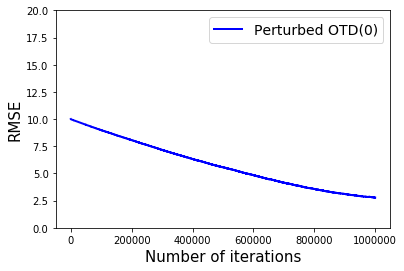

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.average(error_storage_gtd,axis = 0), 'b',linewidth = 2, label = 'Perturbed OTD(0)')

plt.ylim([0,20])

plt.legend(loc = 'best',prop={'size': 14})
plt.xlabel('Number of iterations',fontsize = 15)
plt.ylabel('RMSE',fontsize = 15)
plt.show()

In [54]:
state = np.random.choice(3,1,p=d_mu[0])[0]
print(state)


1
